Library imports

In [201]:
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu

reading files

In [202]:
my_df = pd.read_csv('FACT.csv')
my_df = my_df[['Order ID','Product ID','Sales','Quantity','Discount_Label','Profit','Shipping Cost']]
my_df

,Order ID,Product ID,Sales,Quantity,Discount_Label,Profit,Shipping Cost
0,MX-2013-119970,OFF-ST-10000990,263.920013,2,No Discount,5.24,16.439
1,MX-2013-152219,FUR-CH-10001282,63.520000,2,No Discount,14.60,4.610
2,MX-2014-121076,FUR-BO-10003287,162.759995,2,No Discount,27.64,6.633
3,MX-2013-115084,FUR-BO-10003043,191.960007,2,No Discount,30.68,14.717
4,MX-2014-164294,FUR-BO-10004142,584.200012,2,No Discount,239.52,47.121
...,...,...,...,...,...,...,...
49665,MX-2013-141425,OFF-PA-10003838,28.351999,2,Discount,7.43,1.719
49666,MX-2013-141425,TEC-AC-10003927,61.824001,2,Discount,17.74,2.808
49667,US-2013-132374,OFF-BI-10004080,44.784000,3,Discount,-11.20,2.494
49668,US-2014-115658,OFF-BI-10003392,23.712000,3,Discount,-2.09,1.482


In [203]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49670 entries, 0 to 49669
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        49670 non-null  object 
 1   Product ID      49670 non-null  object 
 2   Sales           49670 non-null  float64
 3   Quantity        49670 non-null  int64  
 4   Discount_Label  49670 non-null  object 
 5   Profit          49670 non-null  float64
 6   Shipping Cost   49670 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 2.7+ MB


In [204]:
my_df.describe()

,Sales,Quantity,Profit,Shipping Cost
count,49670.000000,49670.000000,49670.000000,49670.000000
mean,243.840355,3.470787,28.392251,26.041125
std,485.963091,2.274854,172.399533,56.870281
min,0.444000,1.000000,-6599.980000,0.002000
25%,30.384001,2.000000,0.000000,2.580000
50%,83.970001,3.000000,9.155000,7.660000
75%,247.829998,5.000000,36.267500,23.969000
max,22638.500000,14.000000,8399.980000,933.570000


In [205]:
UnDiscounted_df = my_df[my_df['Discount_Label'] == 'No Discount'].reset_index(drop = True)
Discounted_df = my_df[my_df['Discount_Label'] == 'Discount'].reset_index(drop = True)

In [206]:
UnDiscounted_df = UnDiscounted_df.drop('Discount_Label', axis=1)
UnDiscounted_df

,Order ID,Product ID,Sales,Quantity,Profit,Shipping Cost
0,MX-2013-119970,OFF-ST-10000990,263.920013,2,5.24,16.439
1,MX-2013-152219,FUR-CH-10001282,63.520000,2,14.60,4.610
2,MX-2014-121076,FUR-BO-10003287,162.759995,2,27.64,6.633
3,MX-2013-115084,FUR-BO-10003043,191.960007,2,30.68,14.717
4,MX-2014-164294,FUR-BO-10004142,584.200012,2,239.52,47.121
...,...,...,...,...,...,...
28098,CA-2013-3990,OFF-ELD-10000151,255.779999,2,30.66,65.790
28099,HU-2013-8690,OFF-STA-10001895,20.639999,2,9.06,0.440
28100,MO-2014-9670,OFF-IBI-10000099,29.879999,2,2.64,3.590
28101,RS-2014-5930,OFF-BOS-10002073,113.639999,2,17.04,13.550


In [207]:
Discounted_df = Discounted_df.drop('Discount_Label', axis=1)
Discounted_df

,Order ID,Product ID,Sales,Quantity,Profit,Shipping Cost
0,IN-2013-57914,FUR-CH-10000110,252.839996,7,72.66,18.010
1,ID-2013-15837,FUR-BO-10001192,586.943970,2,168.74,104.750
2,ID-2011-77619,FUR-CH-10004572,98.592003,2,22.15,15.390
3,ID-2012-74630,FUR-CH-10001756,426.359985,11,122.43,65.610
4,ES-2014-1694278,FUR-CH-10002212,267.119995,2,-40.08,41.610
...,...,...,...,...,...,...
21562,MX-2013-141425,OFF-PA-10003838,28.351999,2,7.43,1.719
21563,MX-2013-141425,TEC-AC-10003927,61.824001,2,17.74,2.808
21564,US-2013-132374,OFF-BI-10004080,44.784000,3,-11.20,2.494
21565,US-2014-115658,OFF-BI-10003392,23.712000,3,-2.09,1.482


In [208]:
quantity_dis = Discounted_df['Quantity']
quantity_undis = UnDiscounted_df['Quantity']
print("Total number of the Discounted products sold :", quantity_dis.sum())
print("Total number of the UnDiscounted products sold :",quantity_undis.sum())
print("\n")
print("Average profit of the Discounted products per item :", (Discounted_df['Profit']*quantity_dis).mean())
print("Average profit of the UnDiscounted products per item :",(UnDiscounted_df['Profit']*quantity_undis).mean())

Total number of the Discounted products sold : 76962
Total number of the UnDiscounted products sold : 95432


Average profit of the Discounted products per item : -62.12231464737795
Average profit of the UnDiscounted products per item : 294.43631391666366


So we have sold more products that were not discounted in total compared to the ones that were discounted  

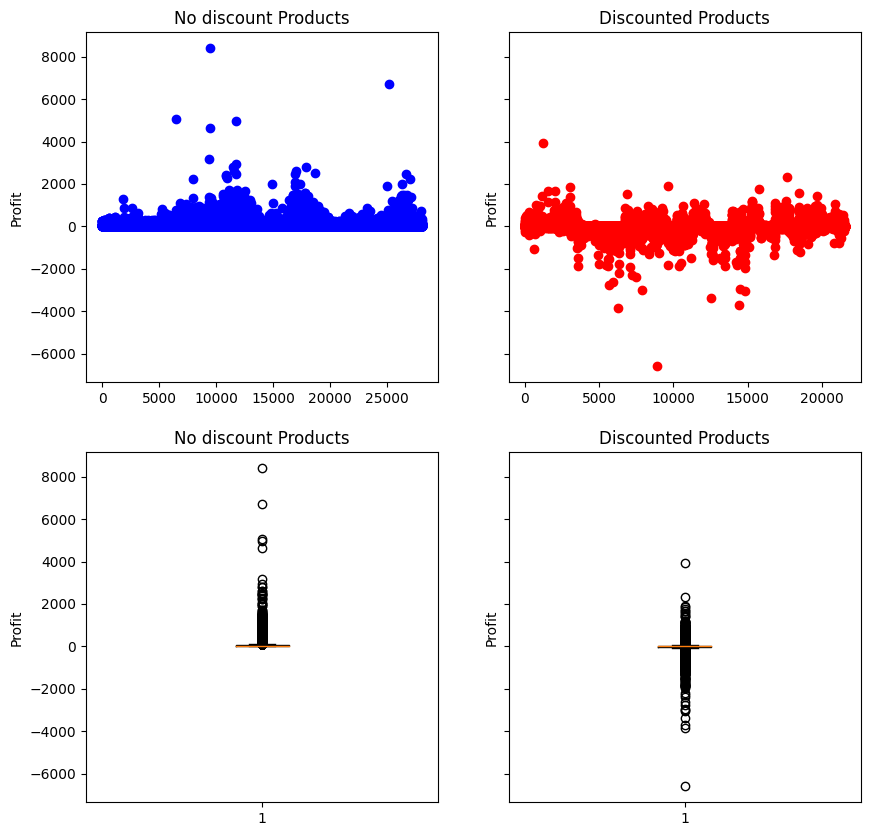

In [209]:
fig, axes = plt.subplots(2, 2, figsize = (10,10), sharey=True)   
axes[0,0].plot(UnDiscounted_df['Profit'],'o',color='blue')
axes[0,0].set_title('No discount Products')
axes[0,0].set_ylabel('Profit')

axes[0,1].plot(Discounted_df['Profit'],'o',color='red')
axes[0,1].set_title('Discounted Products')
axes[0,1].set_ylabel('Profit')

axes[1,0].boxplot([UnDiscounted_df['Profit']])
axes[1,0].set_title('No discount Products')
axes[1,0].set_ylabel('Profit')

axes[1,1].boxplot([Discounted_df['Profit']])
axes[1,1].set_title('Discounted Products')
axes[1,1].set_ylabel('Profit')
plt.show()

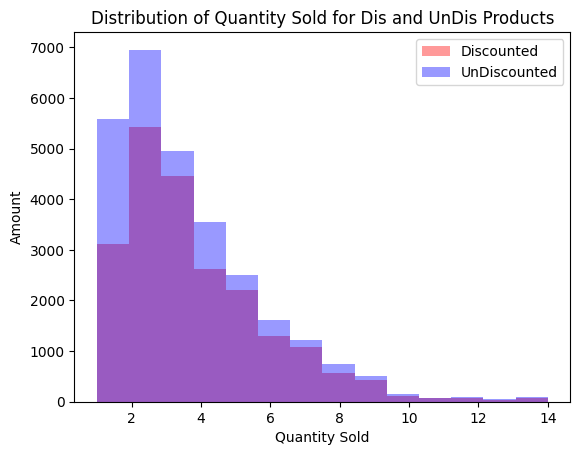

In [210]:
plt.figure()
plt.hist(Discounted_df['Quantity'], bins = 14, alpha = 0.4, label = 'Discounted', color = 'red')
plt.hist(UnDiscounted_df['Quantity'], bins = 14, alpha = 0.4, label = 'UnDiscounted', color = 'blue')
plt.legend()
plt.xlabel('Quantity Sold')
plt.ylabel('Amount')
plt.title('Distribution of Quantity Sold for Dis and UnDis Products')
plt.show()


As we can see almost in every quantity (1-14) the number of sold products in non-discounted items are bigger than the discounted ones

In [211]:
print(shapiro(Discounted_df['Quantity']))
print(shapiro(UnDiscounted_df['Quantity']))

ShapiroResult(statistic=0.8731356691342933, pvalue=8.73201466968743e-84)
ShapiroResult(statistic=0.86203124088409, pvalue=8.376934348032687e-92)


d:\Anaconda\envs\quera\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 21567.
  res = hypotest_fun_out(*samples, **kwds)
d:\Anaconda\envs\quera\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 28103.
  res = hypotest_fun_out(*samples, **kwds)


In [212]:
# now i will use boxcox transformation to see if the data can be normalized or not
discounted_quantity_transformed, lam = stats.boxcox(Discounted_df['Quantity'])
undiscounted_quantity_transformed, lam2 = stats.boxcox(UnDiscounted_df['Quantity'])
print(shapiro(discounted_quantity_transformed))
print(shapiro(undiscounted_quantity_transformed))

ShapiroResult(statistic=0.9479994325221658, pvalue=1.4729218540269416e-64)
ShapiroResult(statistic=0.9349343062336275, pvalue=1.637708620980721e-74)


As we can see the data is not normal even after boxcox transformation so we cannot use tests like T-Test or Anova and we should refer to non-parametric tests like mannwhitneyu

In [213]:
u_stat, p_value = mannwhitneyu(Discounted_df['Quantity'], UnDiscounted_df['Quantity'])
print("mann Whitney u p-value:", p_value)

mann Whitney u p-value: 1.2366179467933793e-30


In [214]:
if p_value < 0.05:
    print("We reject the H0 : There is a big difference between the two groups")
else:
    print("We fail to reject the H0 : There is no big difference between the two groups")

We reject the H0 : There is a big difference between the two groups


In [215]:
Dis_grouped = Discounted_df.groupby('Product ID', as_index = False)['Quantity'].sum().reset_index()
UnDis_grouped = UnDiscounted_df.groupby('Product ID', as_index = False)['Quantity'].sum().reset_index()
Dis_grouped['Profit'] = Discounted_df.groupby('Product ID', as_index = False)['Profit'].mean().reset_index()['Profit']
UnDis_grouped['Profit'] = UnDiscounted_df.groupby('Product ID', as_index = False)['Profit'].mean().reset_index()['Profit']

In [216]:
merged = pd.merge(Dis_grouped[['Product ID','Quantity','Profit']],UnDis_grouped[['Product ID','Quantity','Profit']], on = 'Product ID', suffixes = ('_Dis','_UnDis'))
merged

,Product ID,Quantity_Dis,Profit_Dis,Quantity_UnDis,Profit_UnDis
0,FUR-ADV-10000183,20,-219.116667,11,1.122
1,FUR-ADV-10000188,3,-13.380000,4,10.320
2,FUR-ADV-10001283,2,-111.170000,1,22.200
3,FUR-ADV-10001659,2,-15.780000,8,6.528
4,FUR-ADV-10001855,1,-8.710000,3,7.110
...,...,...,...,...,...
6533,TEC-STA-10003447,1,-106.940000,7,106.890
6534,TEC-STA-10003550,1,-78.720000,13,45.942
6535,TEC-STA-10003925,2,-57.280000,6,81.780
6536,TEC-STA-10004181,1,-147.110000,10,66.000


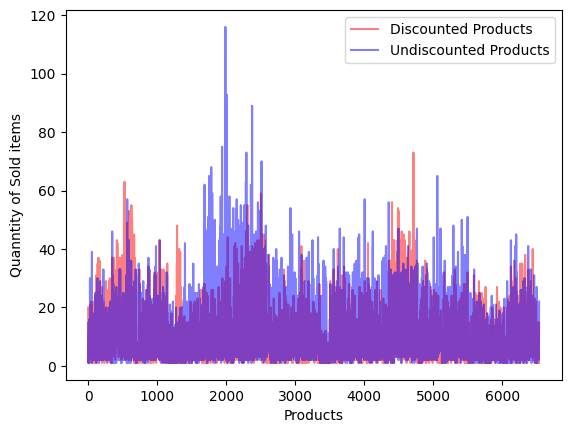

In [217]:
ax = plt.figure()
ax = plt.plot(merged['Quantity_Dis'], alpha = 0.5, color='red', label = 'Discounted Products')
ax = plt.plot(merged['Quantity_UnDis'], alpha = 0.5, color='blue', label = 'Undiscounted Products')
ax = plt.ylabel('Quanntity of Sold items')
ax = plt.xlabel('Products')
plt.legend()
plt.show()

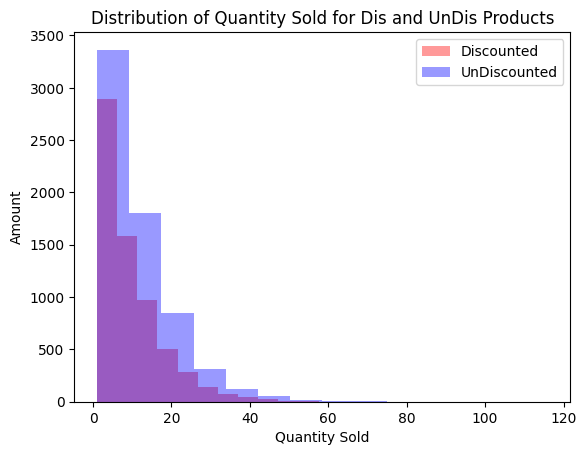

In [218]:
plt.figure()
plt.hist(merged['Quantity_Dis'], bins = 14, alpha = 0.4, label = 'Discounted', color = 'red')
plt.hist(merged['Quantity_UnDis'], bins = 14, alpha = 0.4, label = 'UnDiscounted', color = 'blue')
plt.legend()
plt.xlabel('Quantity Sold')
plt.ylabel('Amount')
plt.title('Distribution of Quantity Sold for Dis and UnDis Products')
plt.show()


In [219]:
u_stat, p_value = mannwhitneyu(merged['Quantity_Dis'], merged['Quantity_UnDis'])
print("mann Whitney u p-value:", p_value)

mann Whitney u p-value: 1.0458955716955667e-37


In [220]:
u_stat, p_value = mannwhitneyu(merged['Profit_Dis'], merged['Profit_UnDis'])
print("mann Whitney u p-value:", p_value)

mann Whitney u p-value: 0.0


So from these results we can confidentally reject the null hypthoesis (H0)

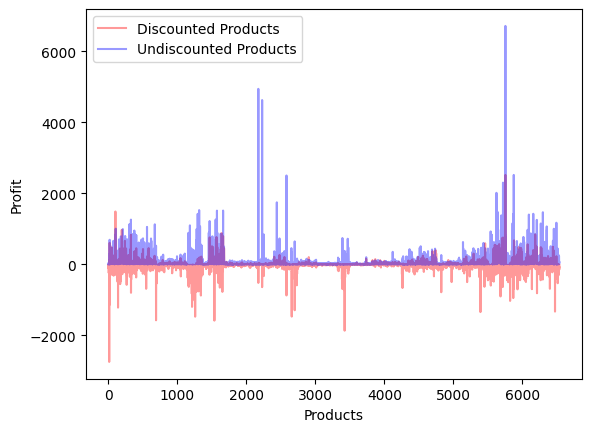

In [222]:
ax = plt.figure()
ax = plt.plot(merged['Profit_Dis'], alpha = 0.4, color='red', label = 'Discounted Products')
ax = plt.plot(merged['Profit_UnDis'], alpha = 0.4, color='blue', label = 'Undiscounted Products')
ax = plt.ylabel('Profit')
ax = plt.xlabel('Products')
plt.legend()
plt.show()

As we can see in here we have much more profit in undiscounted products compared to the discounted ones

So in conclusion we sell less and profit less when the items are discounted, it seems strange but it could be some marketing strategy, they could make some unpopular items discounted (limited) to make them more popular or even to get rid of some items that are on the edge of being expired, so we conclude that making items discounted does not increase profit or even sales in an item, but they could have some passive effects behind the curtain, they could make some name for the company and afteer the product is known items go back to the normal retail price